# 05 — Naive Bayes Model

This notebook implements a **Multinomial Naive Bayes** model for drug usage classification.

**Goal**: Train, evaluate, and export an Naive Bayes model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import os

plt.style.use('../style.mplstyle')

In [2]:
%load_ext watermark
%watermark -v -n -m -p numpy,pandas,sklearn,matplotlib,seaborn,joblib

Python implementation: CPython
Python version       : 3.12.12
IPython version      : 9.10.0

numpy     : 1.26.4
pandas    : 3.0.0
sklearn   : 1.8.0
matplotlib: 3.10.8
seaborn   : 0.13.2
joblib    : 1.5.3

Compiler    : Clang 17.0.0 (clang-1700.6.3.2)
OS          : Darwin
Release     : 25.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



## 1. Load Data

In [3]:
train_df = pd.read_csv('../data/processed/train.csv')
val_df = pd.read_csv('../data/processed/val.csv')
test_df = pd.read_csv('../data/processed/test.csv')

# Handle missing values
train_df['text_clean'] = train_df['text_clean'].fillna('')
val_df['text_clean'] = val_df['text_clean'].fillna('')
test_df['text_clean'] = test_df['text_clean'].fillna('')

print(f"Train: {train_df.shape}")

Train: (2100, 3)


## 2. Feature Extaction (TF-IDF)
Using `ngram_range=(1, 2)` and `max_features=5000`.

In [4]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_df['text_clean'])
X_val = vectorizer.transform(val_df['text_clean'])
X_test = vectorizer.transform(test_df['text_clean'])

y_train = train_df['label']
y_val = val_df['label']
y_test = test_df['label']

## 3. Training (MultinomialNB)

In [5]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


## 4. Evaluation

In [6]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
acc = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {acc:.4f}")

              precision    recall  f1-score   support

    NEGATIVE       0.85      0.83      0.84       225
    POSITIVE       0.83      0.85      0.84       225

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450

Naive Bayes Accuracy: 0.8378


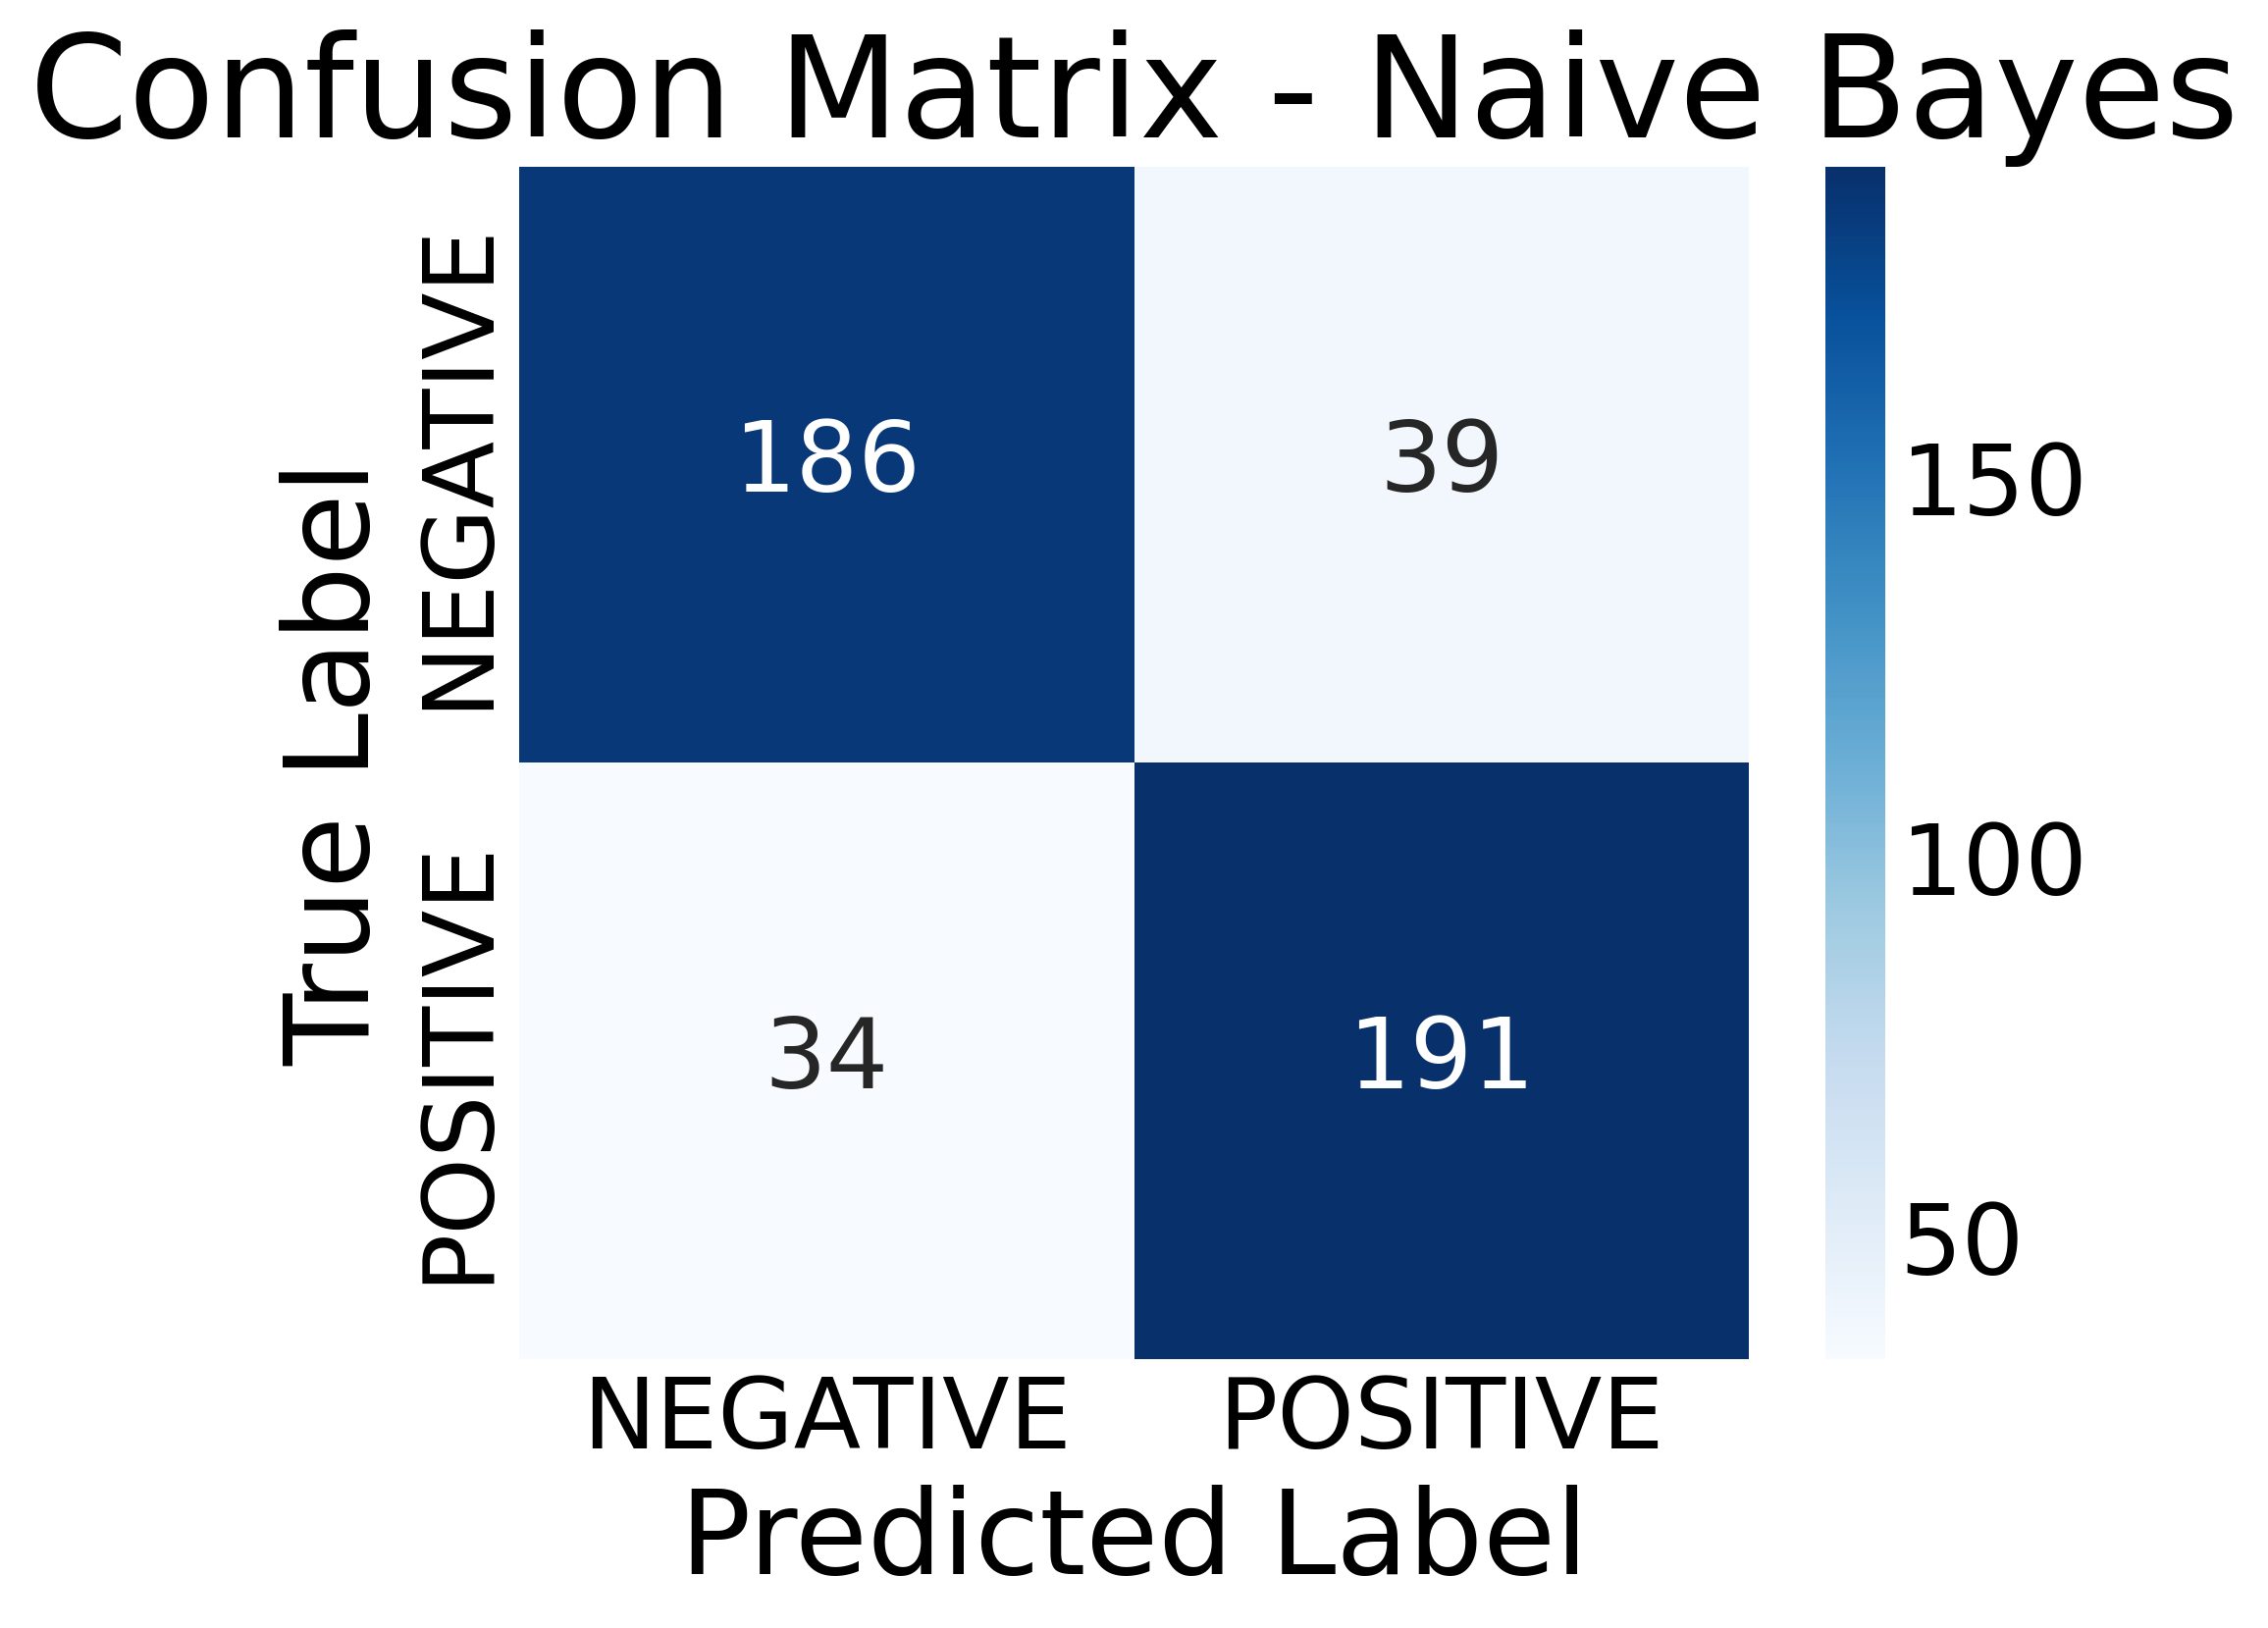

In [7]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

## 5. Model Export

In [8]:
os.makedirs('../models/naive_bayes', exist_ok=True)\n
joblib.dump(clf, '../models/naive_bayes/model.joblib')
joblib.dump(vectorizer, '../models/naive_bayes/vectorizer.joblib')

print("Naive Bayes Model exported to ../models/naive_bayes_model.joblib")

Naive Bayes Model exported to ../models/naive_bayes_model.joblib
